## Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

## Setting

In [2]:
figsize = (16, 12)

## Fucntions

In [3]:
# Read sklearn dataset and convert it to datafame
def sklearn_dataset_to_df(dataset):
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = pd.Series(dataset.target)
    return df


# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        if isinstance(int(xticklabel), int):
            xticklabel = int(xticklabel)
        plt.text(
            x,
            medians_dict[xticklabel] * 1.01,
            "#obs : " + str(n_ob),
            horizontalalignment='center',
            fontdict={'size': 14},
            color='white'
        )

## Read Data

In [4]:
# Get Data: iris
iris = sklearn_dataset_to_df(dataset=load_iris())
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data manipulation

In [5]:
# Convert column names.
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Plot

[Text(0, 0.5, 'Sepal Length (cm)'),
 Text(0.5, 0, 'Species'),
 Text(0.5, 1.0, 'BOX plot of iris')]

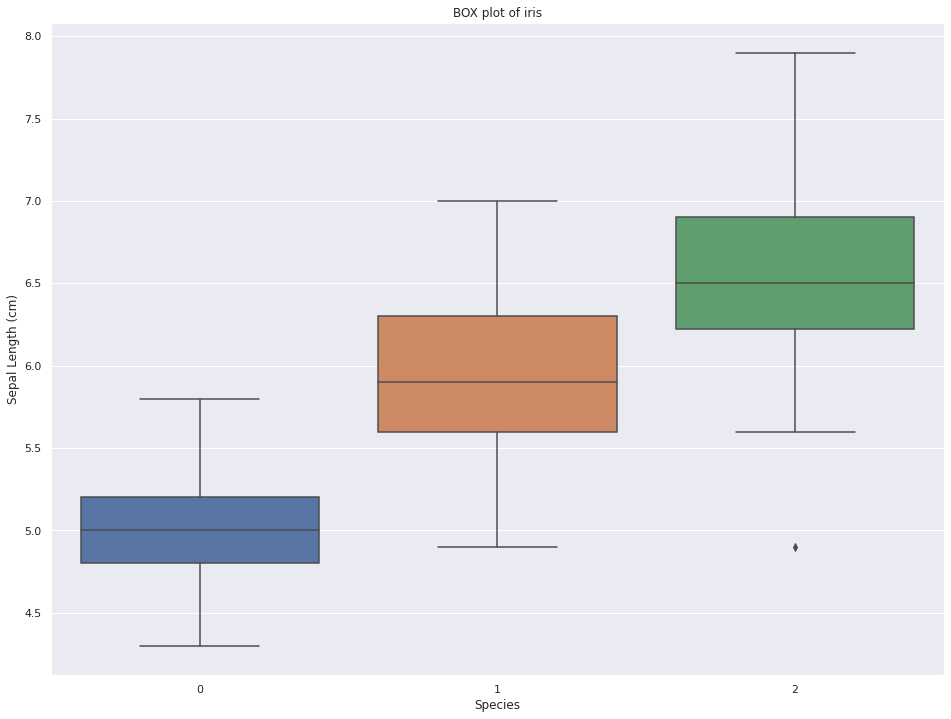

In [6]:
plt.figure(figsize=figsize)
sns.set(style='darkgrid')
fig = sns.boxplot(
    data=iris,
    x='species',
    y='sepal_length',
)
fig.set(
    title='BOX plot of iris',
    xlabel='Species',
    ylabel='Sepal Length (cm)',
)

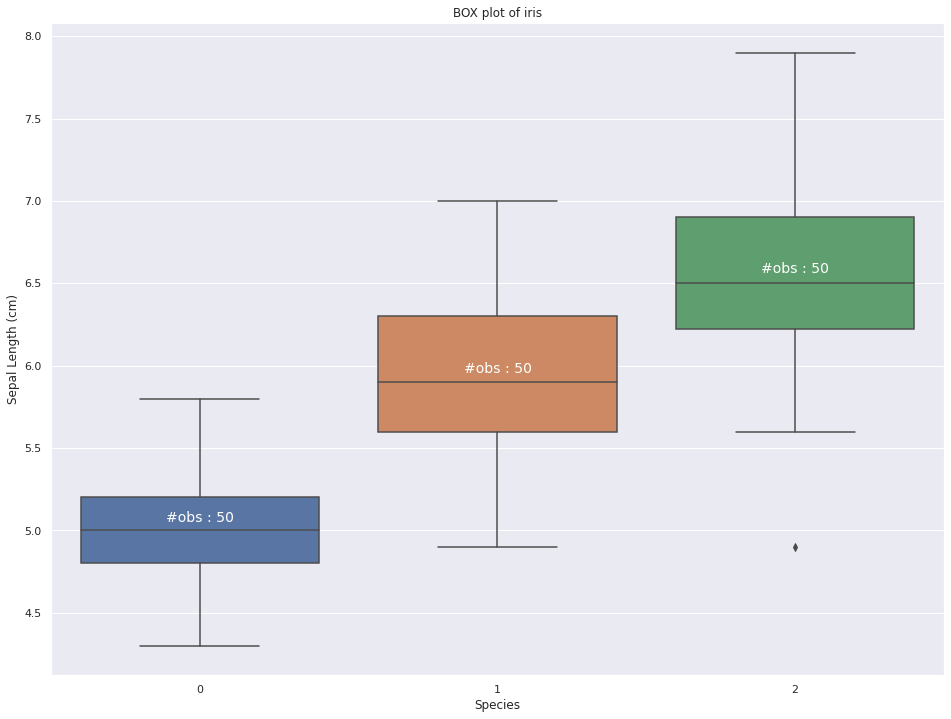

In [7]:
plt.figure(figsize=figsize)
sns.set(style='darkgrid')
fig = sns.boxplot(
    data=iris,
    x='species',
    y='sepal_length',
)
fig.set(
    title='BOX plot of iris',
    xlabel='Species',
    ylabel='Sepal Length (cm)',
)


add_n_obs(iris, group_col='species', y='sepal_length')